In [1]:
import pandas as pd

resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [4]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                             resenha.sentiment,
                                                             random_state = 42)

In [5]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [6]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0, 1])

In [7]:
resenha["classificacao"] = classificacao

In [8]:
resenha

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [9]:
from sklearn.feature_extraction.text import  CountVectorizer

texto = ["Assisti um filme ótimo","Assisti um filme ruim"]

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [10]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns = vetorizar.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
matriz_esparsa

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [12]:
bag_of_words.shape

(2, 5)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao],  random_state = 42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino,classe_treino)
    return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


In [31]:

def nuvem_palavras_neg(texto, coluna_texto):

  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width = 800,height = 500, collocations = False,
                            max_font_size = 110).generate(todas_palavras)
                            
  plt.figure(figsize = (10,7))
  plt.imshow(nuvem_palavras,interpolation = 'bilinear')
  plt.axis('off');
  plt.show()

In [32]:
def nuvem_palavras_pos(texto, coluna_texto):

  texto_pos = texto.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_pos[coluna_texto]])

  nuvem_palavras = WordCloud(width = 800,height = 500, collocations = False,
                            max_font_size = 110).generate(todas_palavras)
                            
  plt.figure(figsize = (10,7))
  plt.imshow(nuvem_palavras,interpolation = 'bilinear')
  plt.axis('off');
  plt.show()





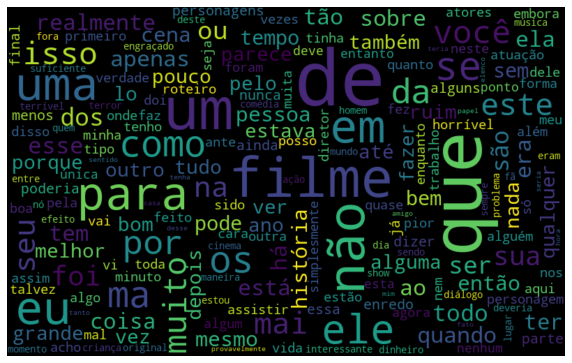

In [33]:
nuvem_palavras_neg(resenha, "text_pt")

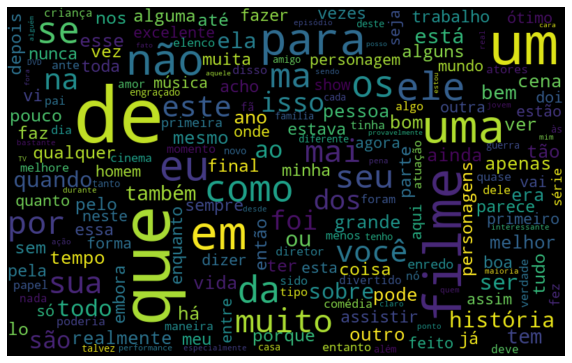

In [34]:
 nuvem_palavras_pos(resenha, "text_pt")